### Merge Sort

In [1]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1


In [2]:
my_list = [38, 27, 43, 3, 9, 82, 10]
merge_sort(my_list)
print("Sorted array (merge sort):", my_list)


Sorted array (merge sort): [3, 9, 10, 27, 38, 43, 82]


### Hybrid Merge Sort

In [3]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def hybrid_merge_sort(arr, threshold=10):
    if len(arr) <= threshold:
        insertion_sort(arr)
    else:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        hybrid_merge_sort(left_half, threshold)
        hybrid_merge_sort(right_half, threshold)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1


In [4]:
my_list = [38, 27, 43, 3, 9, 82, 10]
hybrid_merge_sort(my_list)
print("Sorted array (hybrid merge sort):", my_list)


Sorted array (hybrid merge sort): [3, 9, 10, 27, 38, 43, 82]


### Merge Sort + Numba

In [5]:
import numba

@numba.njit
def merge_sort_numba(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left_half = merge_sort_numba(arr[:mid])
    right_half = merge_sort_numba(arr[mid:])

    return merge_numba(left_half, right_half)

@numba.njit
def merge_numba(left, right):
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result.extend(left[i:])
    result.extend(right[j:])

    return result


### Hybrid Merge Sort + Numba

In [6]:
import numba

@numba.njit
def insertion_sort_numba(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

@numba.njit
def hybrid_merge_sort_numba(arr, threshold=10):
    if len(arr) <= threshold:
        insertion_sort_numba(arr)
    else:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        hybrid_merge_sort_numba(left_half, threshold)
        hybrid_merge_sort_numba(right_half, threshold)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1


### Comparison: 1 test

In [7]:
import time
import random

def load_test(sort_function, array):
    start_time = time.time()
    sort_function(array)
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time

large_array = random.sample(range(1, 1000000), 100000)

unoptimized_time = load_test(merge_sort, large_array.copy())
print(f"Merge Sort Time: {unoptimized_time:.6f} seconds")

hybrid_time = load_test(hybrid_merge_sort, large_array.copy())
print(f"Hybrid Merge Sort Time: {hybrid_time:.6f} seconds")

numba_time = load_test(merge_sort_numba, large_array.copy())
print(f"Merge Sort (Optimized via Numba) Time: {numba_time:.6f} seconds")

hybrid_numba_time = load_test(hybrid_merge_sort_numba, large_array.copy())
print(f"Hybrid Merge Sort (Optimized via Numba) Time: {hybrid_numba_time:.6f} seconds")


Merge Sort Time: 0.204802 seconds
Hybrid Merge Sort Time: 0.171959 seconds
Merge Sort (Optimized via Numba) Time: 1.025053 seconds
Hybrid Merge Sort (Optimized via Numba) Time: 0.949940 seconds


### Comparison: many tests

In [8]:
import memory_profiler
import matplotlib.pyplot as plt


In [9]:
def measure_memory(sort_function, array):
    mem_usage = memory_profiler.memory_usage((sort_function, (array,)))
    return max(mem_usage)

def run_multiple_tests(sort_function, array_generator, num_tests, profile=False):
    execution_times = []
    memory_usages = []

    for _ in range(num_tests):
        test_array = array_generator()

        if profile:
            execution_time = load_test_profile(sort_function, test_array.copy())
        else:
            execution_time = load_test(sort_function, test_array.copy())
        
        execution_times.append(execution_time)

        memory_usage = measure_memory(sort_function, test_array.copy())
        memory_usages.append(memory_usage)

    avg_time = sum(execution_times) / num_tests
    avg_memory = sum(memory_usages) / num_tests

    return avg_time, avg_memory


### Results

In [10]:
from tqdm import tqdm


In [11]:
def generate_random_array(size):
    return random.sample(range(1, size * 10), size)
    

In [12]:
def plot_results(sizes,
                 times_merge, times_hybrid, times_numba, times_hybrid_numba,
                 memories_merge, memories_hybrid, memories_numba, memories_hybrid_numba
                ):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(sizes, times_merge, marker='o', label='Merge Sort')
    plt.plot(sizes, times_hybrid, marker='o', label='Hybrid Merge Sort')
    plt.plot(sizes, times_numba, marker='o', label='Merge Sort (Optimized via Numba)')
    plt.plot(sizes, times_hybrid_numba, marker='o', label='Hybrid Merge Sort (Optimized via Numba)')
    plt.title('Average Time vs Input Size')
    plt.xlabel('Input Size')
    plt.ylabel('Average Time (s)')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(sizes, memories_merge, marker='o', label='Merge Sort')
    plt.plot(sizes, memories_hybrid, marker='o', label='Hybrid Merge Sort')
    plt.plot(sizes, memories_numba, marker='o', label='Merge Sort (Optimized via Numba)')
    plt.plot(sizes, memories_hybrid_numba, marker='o', label='Hybrid Merge Sort (Optimized via Numba)')
    plt.title('Average Memory vs Input Size')
    plt.xlabel('Input Size')
    plt.ylabel('Average Memory Usage (MB)')
    plt.legend()

    plt.tight_layout()
    plt.show()
    

In [13]:
num_tests = 5
input_sizes = [100 * n for n in range(1, 50)]

avg_times_merge = []
avg_times_hybrid = []
avg_times_numba = []
avg_times_hybrid_numba = []

avg_memories_merge = []
avg_memories_hybrid = []
avg_memories_numba = []
avg_memories_hybrid_numba = []

for size in tqdm(input_sizes):
    avg_time_merge, avg_memory_merge = run_multiple_tests(merge_sort, lambda: generate_random_array(size), num_tests)
    avg_times_merge.append(avg_time_merge)
    avg_memories_merge.append(avg_memory_merge)

    avg_time_hybrid, avg_memory_hybrid = run_multiple_tests(hybrid_merge_sort, lambda: generate_random_array(size), num_tests)
    avg_times_hybrid.append(avg_time_hybrid)
    avg_memories_hybrid.append(avg_memory_hybrid)

    avg_time_numba, avg_memory_numba = run_multiple_tests(merge_sort_numba, lambda: generate_random_array(size), num_tests)
    avg_times_numba.append(avg_time_numba)
    avg_memories_numba.append(avg_memory_numba)

    avg_time_hybrid_numba, avg_memory_hybrid_numba = run_multiple_tests(hybrid_merge_sort_numba, lambda: generate_random_array(size), num_tests)
    avg_times_hybrid_numba.append(avg_time_hybrid_numba)
    avg_memories_hybrid_numba.append(avg_memory_hybrid_numba)


100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [33:01<00:00, 40.44s/it]


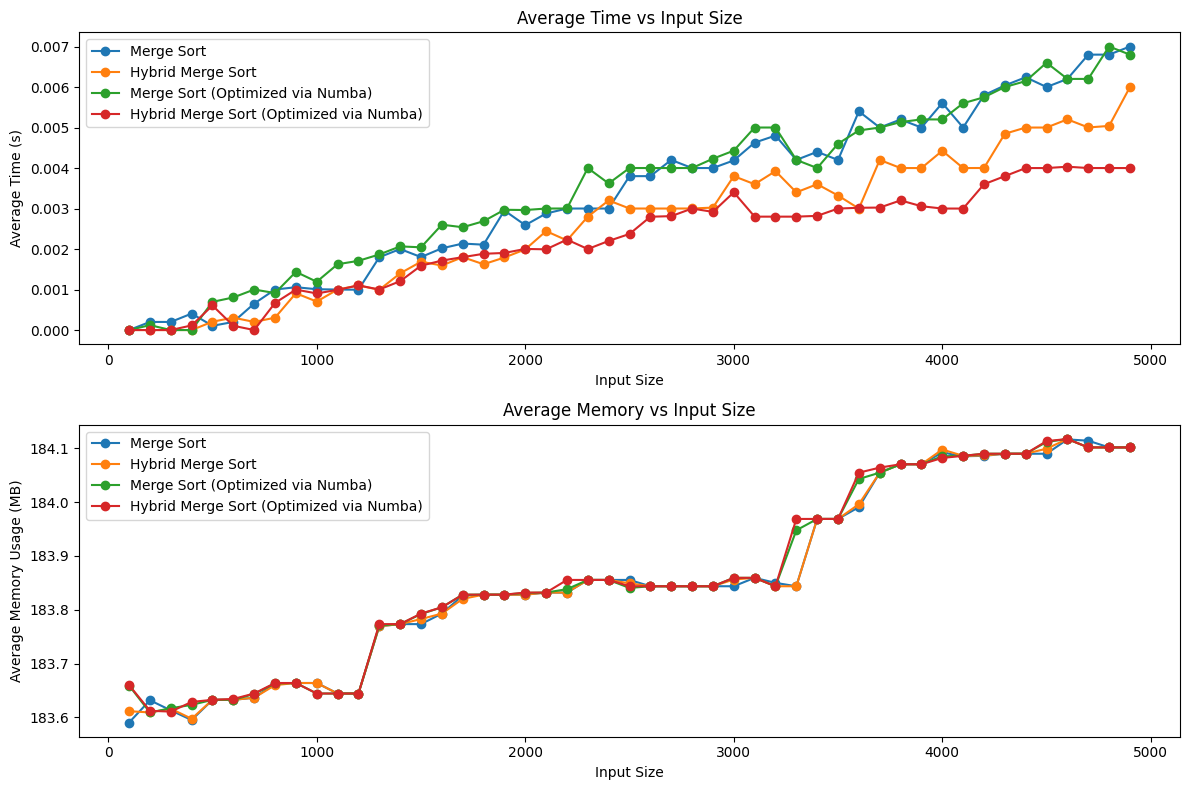

In [14]:
plot_results(input_sizes,
             avg_times_merge, avg_times_hybrid, avg_times_numba, avg_times_hybrid_numba,
             avg_memories_merge, avg_memories_hybrid, avg_memories_numba, avg_memories_hybrid_numba
            )
